In [1]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

In [2]:
df_train = pd.read_csv('train_after_mvi.csv')

In [3]:
df_test = pd.read_csv('test_after_mvi.csv')

In [4]:
df_train.head(5)

,Country,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Dependent Variable (Bankruptcy)
0,Japan,4500.0,133000.0,17000.0,15000.0,4300.0,118700.0,101100.0,14600.0,68500.0,13500.0,15,0
1,Japan,2200.0,118900.0,9700.0,5000.0,4500.0,75600.0,88200.0,32800.0,60900.0,6400.0,15,0
2,Japan,6800.0,219400.0,44100.0,85700.0,11100.0,116200.0,174000.0,9400.0,81100.0,11200.0,20,0
3,Japan,3000.0,223200.0,35800.0,41800.0,6000.0,104000.0,206000.0,1600.0,64800.0,5800.0,20,0
4,Japan,3500.0,196500.0,32800.0,43700.0,6000.0,88700.0,150400.0,200.0,66800.0,6400.0,20,0


In [5]:
df_test.head(5)

,Country,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Dependent Variable (Bankruptcy)
0,France,-9200.0,106800.0,-9500.0,-20000.0,-3600.0,95100.0,18500.0,45300.0,66700.0,57500.0,20,1
1,France,-46100.0,87600.0,-74700.0,-150100.0,-22400.0,90600.0,31700.0,73000.0,40000.0,276300.0,25,1
2,France,-20700.0,34900.0,1500.0,-20700.0,-17300.0,59800.0,74400.0,21300.0,57200.0,-58700.0,45,1
3,France,4700.0,247000.0,48100.0,4700.0,10100.0,82000.0,206300.0,0.0,80800.0,7500.0,45,0
4,France,7400.0,192400.0,32100.0,7400.0,9400.0,116200.0,183600.0,16600.0,66800.0,16300.0,20,0


In [6]:
df_train.dtypes

Country                             object
V1                                 float64
V2                                 float64
V3                                 float64
V4                                 float64
V5                                 float64
V6                                 float64
V7                                 float64
V8                                 float64
V9                                 float64
V10                                float64
V11                                  int64
Dependent Variable (Bankruptcy)      int64
dtype: object

In [7]:
df_train['Country'] =df_train['Country'].astype('category')
df_train['V11'] =df_train['V11'].astype('category')

In [8]:
df_test['Country'] =df_test['Country'].astype('category')
df_test['V11'] =df_test['V11'].astype('category')

In [9]:
df_test.dtypes

Country                            category
V1                                  float64
V2                                  float64
V3                                  float64
V4                                  float64
V5                                  float64
V6                                  float64
V7                                  float64
V8                                  float64
V9                                  float64
V10                                 float64
V11                                category
Dependent Variable (Bankruptcy)       int64
dtype: object

In [10]:
#Dropping Countries column as our model is based on financial factors related to the company. 
df_train = df_train.drop(columns=['Country'],axis=1)
df_test = df_test.drop(columns=['Country'],axis=1)

In [11]:
##Get_Dummies : Convert categorical variable into dummy/indicator variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [12]:
#Renaming the Dependent variable bankruptcy column
df_train.rename(index=str,columns={'Dependent Variable (Bankruptcy)':'Bankrupt'},inplace=True)
df_test.rename(index=str,columns={'Dependent Variable (Bankruptcy)':'Bankrupt'},inplace=True)

In [13]:
#Dropping Bankrupt from 
X_test = df_test.drop(columns = ['Bankrupt'], axis = 1)
y_test = df_test['Bankrupt']

In [14]:
#Dividing X_train and y_train variables
X_train = df_train.drop(columns = ['Bankrupt'], axis = 1) 
y_train = df_train['Bankrupt'] 

In [15]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11_10',
       'V11_15', 'V11_20', 'V11_25', 'V11_30', 'V11_35', 'V11_45', 'V11_50',
       'V11_55'],
      dtype='object')

In [16]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11_10',
       'V11_15', 'V11_20', 'V11_25', 'V11_30', 'V11_35', 'V11_45', 'V11_50',
       'V11_55'],
      dtype='object')

In [17]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11_10',
       'V11_15', 'V11_20', 'V11_25', 'V11_30', 'V11_35', 'V11_45', 'V11_50',
       'V11_55'],
      dtype='object')

In [18]:
## Running Models 
## Logistics Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_accuracy = lr.score(X_train, y_train)
train_accuracy = np.round(train_accuracy*100, 2)

In [19]:
train_accuracy

81.55

Train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.

In [20]:
y_pred = lr.predict(X_test)

In [21]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [22]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[36, 12],
       [13, 33]], dtype=int64)

In [23]:
y_train_pred = lr.predict(X_train)

In [24]:
cnf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix_train

array([[154,  32],
       [ 37, 151]], dtype=int64)

Tuning Hyperparameters
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes

In [25]:
lr_params = {'penalty':['l1', 'l2'],
             'Cp np.logspace(0, 4, 10)}

In [26]:
from sklearn.model_selection import GridSearchCV
global best_params, best_score
# Construct grid search object with 10 fold cross validation.
grid = GridSearchCV(lr, lr_params, verbose = 0, cv = 10, scoring = 'accuracy', n_jobs = -1)
# Fit using grid search.
grid.fit(X_train, y_train)
best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)

In [27]:
print('LR Best Score:', best_score)
print('And Best Parameters:', best_params)

LR Best Score: 83.96
And Best Parameters: {'C': 1.0, 'penalty': 'l1'}


In [28]:
'''Instantiate the models with optimized hyperparameters.'''
lr_optimized  = LogisticRegression(**best_params)

In [29]:
lr_optimized.fit(X_train, y_train)
train_accuracy_opt = lr_optimized.score(X_train, y_train)
train_accuracy_opt = np.round(train_accuracy_opt*100, 2)

In [30]:
train_accuracy_opt

83.69

In [31]:
y_pred_opt = lr_optimized.predict(X_test)

In [32]:
cnf_matrix_opt = metrics.confusion_matrix(y_test, y_pred_opt)
cnf_matrix_opt

array([[39,  9],
       [10, 36]], dtype=int64)

In [33]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_optimized.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [34]:
y_train_pred_opt = lr_optimized.predict(X_train)

In [35]:
cnf_matrix_train_opt = metrics.confusion_matrix(y_train, y_train_pred_opt)
cnf_matrix_train_opt

array([[166,  20],
       [ 41, 147]], dtype=int64)

In [43]:
f'''Function to plot ROC curve with AUC score.'''
def plot_roc_and_auc_score(model, title):
    from sklearn.metrics import roc_curve, roc_auc_score
    probablity = model.predict_proba(X_train)[:, 1]
    plt.figure(figsize = (18, 5))
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, probablity)
    auc_score = roc_auc_score(y_train, probablity)
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], 'red', lw = 3.7)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

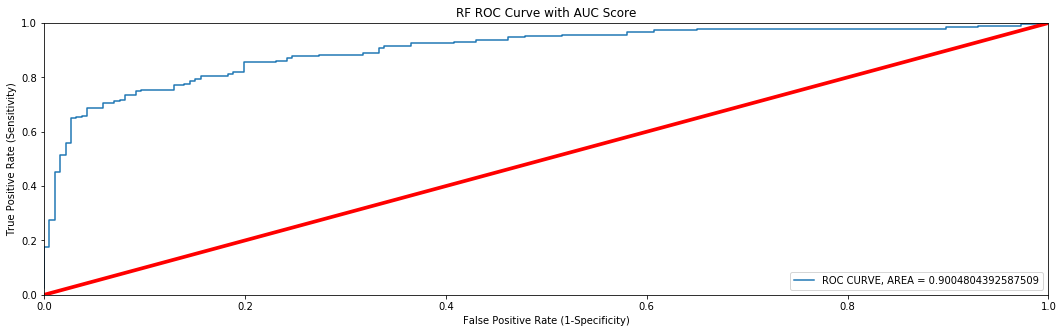

In [47]:
plot_roc_and_auc_score(lr, title = 'RF ROC Curve with AUC Score')

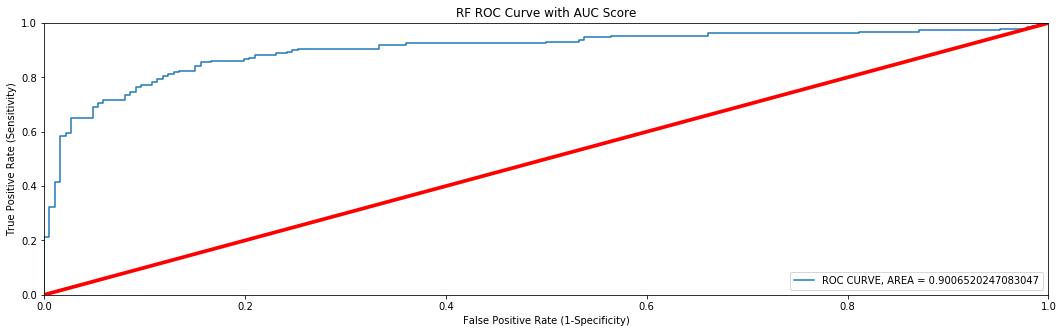

In [44]:
plot_roc_and_auc_score(lr_optimized, title = 'RF ROC Curve with AUC Score')

In [45]:
f'''Function to plot ROC curve with AUC score.'''
def plot_roc_and_auc_score_test(model, title):
    from sklearn.metrics import roc_curve, roc_auc_score
    probablity = model.predict_proba(X_test)[:, 1]
    plt.figure(figsize = (18, 5))
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, probablity)
    auc_score = roc_auc_score(y_test, probablity)
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], 'red', lw = 3.7)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

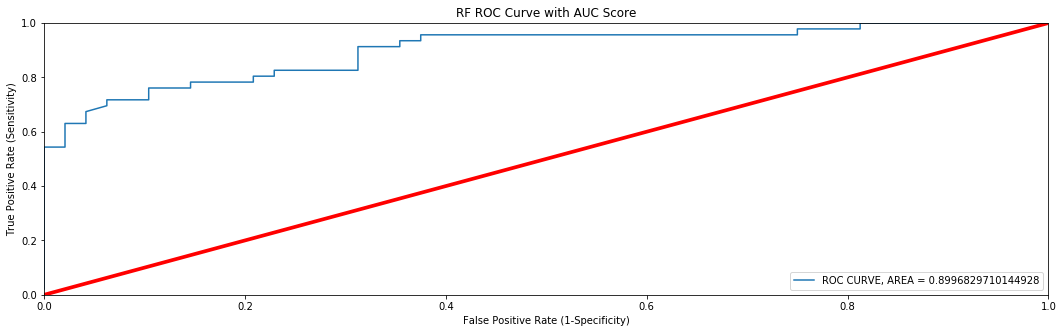

In [46]:
plot_roc_and_auc_score_test(lr_optimized, title = 'RF ROC Curve with AUC Score')

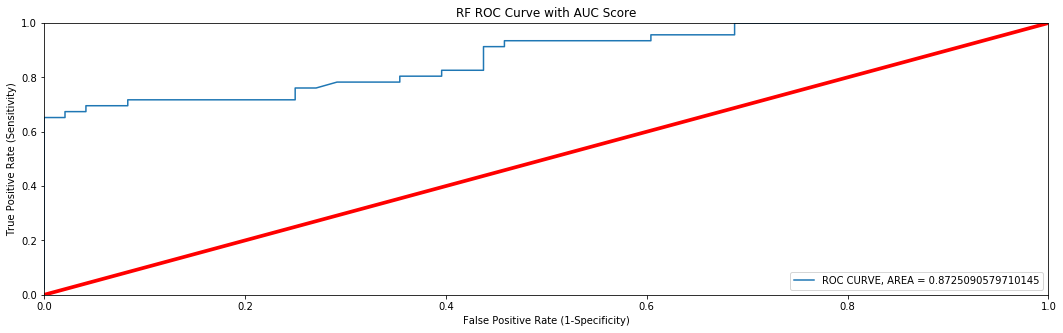

In [48]:
plot_roc_and_auc_score_test(lr, title = 'RF ROC Curve with AUC Score')